<a href="https://colab.research.google.com/github/theesminh04/ThucHanh03/blob/main/thuchan03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NHẬP DỮ LIỆU

In [3]:
import pandas as pd
df = pd.read_csv('/content/NordpoolMarket.csv', sep=';')
df

,HourUTC,HourDK,PriceArea,SpotPurchase,SpotSale,SpotPriceDKK,ElbasAveragePriceDKK,ElbasMaxPriceDKK,ElbasMinPriceDKK,SpotPriceEUR,ElbasAveragePriceEUR,ElbasMaxPriceEUR,ElbasMinPriceEUR
0,2021-04-30 21:00,2021-04-30 23:00,DK1,"0,000000","0,000000","512,020020",NaN,NaN,NaN,"68,860001",NaN,NaN,NaN
1,2021-04-30 21:00,2021-04-30 23:00,DK2,"776,000000","0,000000","512,020020",NaN,NaN,NaN,"68,860001",NaN,NaN,NaN
2,2021-04-30 20:00,2021-04-30 22:00,DK1,"0,000000","0,000000","559,390015","472,706512","488,470825","456,496033","75,230003","63,570000","65,690002","61,389999"
3,2021-04-30 20:00,2021-04-30 22:00,DK2,"762,000000","0,000000","559,390015","484,009247","489,214447","479,398926","75,230003","65,089996","65,790001","64,470001"
4,2021-04-30 19:00,2021-04-30 21:00,DK1,"0,000000","0,000000","585,260010","542,604919","557,105103","526,022644","78,709999","72,970001","74,919998","70,739998"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99349,2015-08-31 00:00,2015-08-31 02:00,DK2,"843,000000","111,099998","135,460007",NaN,NaN,NaN,"18,150000",NaN,NaN,NaN
99350,2015-08-30 23:00,2015-08-31 01:00,DK1,"1325,300049","189,800003","137,100006","90,300003","90,300003","90,300003","18,370001","12,100000","12,100000","12,100000"
99351,2015-08-30 23:00,2015-08-31 01:00,DK2,"869,900024","102,199997","137,100006",NaN,NaN,NaN,"18,370001",NaN,NaN,NaN
99352,2015-08-30 22:00,2015-08-31 00:00,DK1,"1353,000000","179,199997","141,130005","130,600006","130,600006","130,600006","18,910000","17,500000","17,500000","17,500000"


XỬ LÝ GIÁ TRỊ BỊ THIẾU

In [8]:
import pandas as pd

# Đọc lại file với dấu phân cách ";"
df_raw = pd.read_csv("NordpoolMarket.csv", sep=';')

# Chuyển dấu phẩy sang dấu chấm và ép kiểu float
for col in df_raw.columns[3:]:
    df_raw[col] = df_raw[col].str.replace(",", ".").astype(float)

# Chuyển cột thời gian sang datetime
df_raw["HourUTC"] = pd.to_datetime(df_raw["HourUTC"], format="%Y-%m-%d %H:%M")
df_raw["HourDK"] = pd.to_datetime(df_raw["HourDK"], format="%Y-%m-%d %H:%M")

# Sắp xếp và đặt lại index theo thời gian UTC
df_cleaned = df_raw.sort_values(by=["HourUTC", "PriceArea"]).set_index("HourUTC")


In [9]:
df_reset = df_cleaned.reset_index()


In [19]:
interpolated_groups = []

for area in df_reset["PriceArea"].unique():
    group = df_reset[df_reset["PriceArea"] == area].copy()
    group.sort_values("HourUTC", inplace=True)

    # Đặt lại index là HourUTC để interpolate theo thời gian hoạt động
    group.set_index("HourUTC", inplace=True)

    # Chỉ lấy các cột số để nội suy
    numeric_cols = group.select_dtypes(include=['float64', 'int64']).columns

    # Nội suy theo thời gian
    group[numeric_cols] = group[numeric_cols].interpolate(method='time')

    # Đặt lại index về mặc định trước khi nối lại
    group.reset_index(inplace=True)
    interpolated_groups.append(group)

# Gộp lại và đặt lại index chính là HourUTC
df_interpolated = pd.concat(interpolated_groups)
df_interpolated.set_index("HourUTC", inplace=True)

print(df_interpolated.info())
print(df_interpolated.head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 99354 entries, 2015-08-30 22:00:00 to 2021-04-30 21:00:00
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   HourDK                99354 non-null  datetime64[ns]
 1   PriceArea             99354 non-null  object        
 2   SpotPurchase          99354 non-null  float64       
 3   SpotSale              99354 non-null  float64       
 4   SpotPriceDKK          99354 non-null  float64       
 5   ElbasAveragePriceDKK  99349 non-null  float64       
 6   ElbasMaxPriceDKK      99349 non-null  float64       
 7   ElbasMinPriceDKK      99349 non-null  float64       
 8   SpotPriceEUR          99354 non-null  float64       
 9   ElbasAveragePriceEUR  99349 non-null  float64       
 10  ElbasMaxPriceEUR      99349 non-null  float64       
 11  ElbasMinPriceEUR      99349 non-null  float64       
dtypes: datetime64[ns](1), float64(10), obje

TÁCH DỮ LIỆU THEO KHU VỰC

In [15]:
df_dk1 = df_interpolated[df_interpolated["PriceArea"] == "DK1"].drop(columns=["PriceArea"])
df_dk2 = df_interpolated[df_interpolated["PriceArea"] == "DK2"].drop(columns=["PriceArea"])

print("DK1 shape:", df_dk1.shape)
print("DK2 shape:", df_dk2.shape)

print("DK1 time range:", df_dk1.index.min(), "→", df_dk1.index.max())
print("DK2 time range:", df_dk2.index.min(), "→", df_dk2.index.max())


DK1 shape: (49677, 11)
DK2 shape: (49677, 11)
DK1 time range: 2015-08-30 22:00:00 → 2021-04-30 21:00:00
DK2 time range: 2015-08-30 22:00:00 → 2021-04-30 21:00:00


MÔ HÌNH GAUSSIAN MIXTURE

In [17]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Chọn một vài cột để phân cụm, ví dụ: giá và lượng giao dịch
features = ["SpotPriceEUR", "SpotPurchase", "SpotSale"]
X = df_dk1[features].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

gmm = GaussianMixture(n_components=3, random_state=0)
df_dk1["MarketState"] = gmm.fit_predict(X_scaled)

# Kiểm tra phân phối và thống kê mô tả các cụm
print(df_dk1["MarketState"].value_counts())
print(df_dk1.groupby("MarketState")[features].describe())


MarketState
0    21851
1    18248
2     9578
Name: count, dtype: int64
            SpotPriceEUR                                              \
                   count       mean        std        min        25%   
MarketState                                                            
0                21851.0  34.333225  11.243137 -12.900000  26.209999   
1                18248.0  29.124244  12.551880 -19.219999  21.379999   
2                 9578.0  38.069233  26.085975 -58.799999  16.020000   

                                              SpotPurchase               ...  \
                   50%        75%         max        count         mean  ...   
MarketState                                                              ...   
0            33.360001  42.439999   63.070000      21851.0  1771.634459  ...   
1            29.700001  37.520000   62.630001      18248.0  1072.778545  ...   
2            38.695000  58.887500  200.039993       9578.0  2541.160274  ...   

               

MÔ HÌNH GAUSSIAN TRANSFORM

In [21]:
import torch
import torch.nn as nn

class SimpleGaussianAttention(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.input_dim = input_dim

    def forward(self, x):
        # x: [batch, time, features]
        T = x.shape[1]
        time_grid = torch.arange(T).float().to(x.device)
        # Gaussian kernel attention matrix [T, T]
        attention_weights = torch.exp(-((time_grid[None, :] - time_grid[:, None]) ** 2) / (2 * 3**2))
        attention_weights /= attention_weights.sum(dim=-1, keepdim=True)
        # Apply attention weights to input
        return torch.matmul(attention_weights, x)

# Tạo giả lập input sequence: batch_size=2, time_steps=5, features=3
x = torch.randn(2, 5, 3)

# Khởi tạo model
model = SimpleGaussianAttention(input_dim=3)

# Chạy forward
output = model(x)

print("Input:\n", x)
print("\nOutput:\n", output)


Input:
 tensor([[[-2.1134, -2.1364, -1.8920],
         [-0.6922, -0.4634, -0.2345],
         [ 1.5558,  1.9506,  0.7473],
         [ 1.8399,  0.3416,  0.1412],
         [ 0.4231, -1.6839,  0.9788]],

        [[-1.6769, -0.2936, -1.1813],
         [-0.2515, -0.2415, -1.0467],
         [-0.4948, -0.4413,  0.2368],
         [-1.7640, -0.3388,  0.3690],
         [ 1.1378,  1.0969,  0.6080]]])

Output:
 tensor([[[-0.0618, -0.3979, -0.2730],
         [ 0.1187, -0.3226, -0.1420],
         [ 0.2866, -0.2723, -0.0161],
         [ 0.4363, -0.2496,  0.1020],
         [ 0.5634, -0.2545,  0.2100]],

        [[-0.7739, -0.1673, -0.4006],
         [-0.7044, -0.1262, -0.2968],
         [-0.6305, -0.0772, -0.1921],
         [-0.5522, -0.0210, -0.0899],
         [-0.4699,  0.0414,  0.0070]]])


BIỂU ĐỒ PHÂN CỤM THỊ TRƯỜNG ĐIỆN DK1

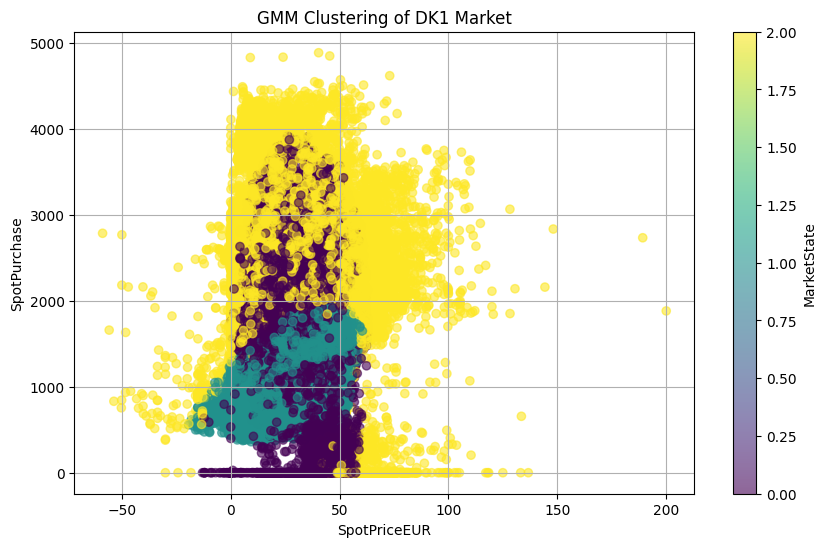

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X["SpotPriceEUR"], X["SpotPurchase"], c=df_dk1.loc[X.index, "MarketState"], cmap="viridis", alpha=0.6)
plt.xlabel("SpotPriceEUR")
plt.ylabel("SpotPurchase")
plt.title("GMM Clustering of DK1 Market")
plt.colorbar(label="MarketState")
plt.grid(True)
plt.show()
